In [57]:
### Import the necessary modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [58]:
### Read the data from the folder sample_data
# Read the train and test dataset into separate dataframes
train_df = pd.read_csv('.\\california_housing_train.csv')
test_df = pd.read_csv('.\\california_housing_test.csv')

# Define response feature
RESPONSE_STR = 'median_house_value'

In [59]:
### Plot the features pair-wise (find correlated features)
correlated_features = [
    'population',
    'households',
    'total_rooms',
    # 'total_bedrooms'
]

# sb.pairplot(train_df.drop([RESPONSE_STR]+correlated_features, axis=1))

In [60]:
### Get your train/test predictor and response
# Drop all collinear features
train_df.drop(correlated_features, axis=1, inplace=True)
test_df.drop(correlated_features, axis=1, inplace=True)

# ## P.S. automatic way
# corr_matrix = train_df.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# print(to_drop)
# train_df.drop(to_drop,axis=1,inplace=True)

# Set all columns except median_house_value as the predictors
train_predictor = train_df.drop(RESPONSE_STR, axis=1)
test_predictor = test_df.drop(RESPONSE_STR, axis=1)

# Set the median_house_value as the response
train_response = train_df[[RESPONSE_STR]]
test_response = test_df[[RESPONSE_STR]]

# Convert response to log scale
train_response = np.log(train_response)
test_response = np.log(test_response)

# Standardize the train and test predictor values
train_predictor = (train_predictor - train_predictor.mean())/train_predictor.std()
test_predictor = (test_predictor - test_predictor.mean())/test_predictor.std()

In [61]:
### Define a simple NN model that takes the predictors as input and outputs the median house value
# The architecture of the model is left to you as an exercise
my_model = Sequential()
my_model.add(Dense(16, input_dim=len(train_predictor.columns), activation='relu'))
my_model.add(Dense(32, activation='relu'))
my_model.add(Dense(16, activation='sigmoid'))
my_model.add(Dense(1, activation='relu'))

In [62]:
### Compile the defined NN model
my_model.compile(loss='mse', optimizer='adam')

In [63]:
### Fit the model on the train data with a validation split of 0.2
EPOCHS      = 30
BATCH_SIZE  = 32
V_SPLIT     = 0.2

history = my_model.fit(
   x = train_predictor,
   y = train_response,
   epochs = EPOCHS,
   batch_size = BATCH_SIZE,
   validation_split = V_SPLIT,
)

Epoch 1/50
425/425 [==============================] - 1s 2ms/step - loss: 45.1245 - val_loss: 12.9374
Epoch 2/50
425/425 [==============================] - 1s 2ms/step - loss: 4.1226 - val_loss: 1.2566
Epoch 3/50
425/425 [==============================] - 1s 2ms/step - loss: 0.4475 - val_loss: 0.4313
Epoch 4/50
425/425 [==============================] - 1s 2ms/step - loss: 0.3127 - val_loss: 0.3917
Epoch 5/50
425/425 [==============================] - 1s 2ms/step - loss: 0.3093 - val_loss: 0.3903
Epoch 6/50
425/425 [==============================] - 1s 2ms/step - loss: 0.2991 - val_loss: 0.3940
Epoch 7/50
425/425 [==============================] - 1s 2ms/step - loss: 0.2282 - val_loss: 0.2539
Epoch 8/50
425/425 [==============================] - 1s 2ms/step - loss: 0.1426 - val_loss: 0.1426
Epoch 9/50
425/425 [==============================] - 1s 2ms/step - loss: 0.1149 - val_loss: 0.1200
Epoch 10/50
425/425 [==============================] - 1s 2ms/step - loss: 0.1067 - val_loss: 0.11

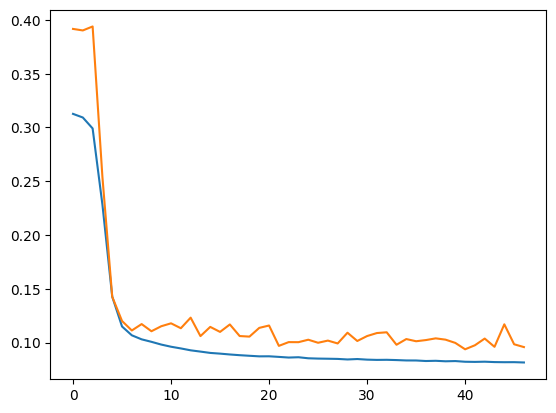

In [64]:
### Plot the train and validation loss(MSE)
plt.plot(history.history['loss'][3:], label='loss')
plt.plot(history.history['val_loss'][3:], label='val_loss')
plt.show()

In [65]:
# Predict the model on the test data
test_prediction = my_model.predict(test_predictor)

# Compute the MSE of the model on the test data
test_mse = np.square((test_response-test_prediction)).mean()

print(test_mse)

94/94 [==============================] - 0s 1ms/step
median_house_value    0.089099
dtype: float64
